In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt

In [2]:
df = pd.read_csv('capstone_mobile.csv')

In [3]:
df.head(20)

,Taken_product,Yearly_avg_view_on_travel_page_code,Daily_Avg_mins_spend_on_traveling_page_code,montly_avg_comment_on_company_page_code,total_likes_on_outofstation_checkin_received_code,Yearly_avg_comment_on_travel_page_code,total_likes_on_outstation_checkin_given_code,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,week_since_last_outstation_checkin,following_company_page,working_flag,travelling_network_rating,Adult_flag
0,1,3,0,1,2,3,3,1,1,2,0,8,1,0,1,0
1,0,3,0,2,2,3,3,3,1,1,0,1,0,1,4,1
2,1,2,0,1,0,2,2,1,1,2,1,6,1,0,2,0
3,0,2,0,1,1,2,2,3,1,4,0,1,1,0,3,0
4,0,2,0,1,1,2,2,1,1,1,2,9,0,0,4,1
5,0,2,0,1,1,2,2,3,1,2,0,0,0,0,3,0
6,0,2,0,2,3,2,2,3,23,3,0,0,0,1,2,0
7,0,2,0,1,0,2,2,1,16,3,2,0,0,0,3,1
8,0,2,0,1,1,2,2,1,15,2,0,0,1,0,4,0
9,0,2,0,1,1,2,2,1,26,1,0,1,0,0,4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9347 entries, 0 to 9346
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   Taken_product                                      9347 non-null   int64
 1   Yearly_avg_view_on_travel_page_code                9347 non-null   int64
 2   Daily_Avg_mins_spend_on_traveling_page_code        9347 non-null   int64
 3   montly_avg_comment_on_company_page_code            9347 non-null   int64
 4   total_likes_on_outofstation_checkin_received_code  9347 non-null   int64
 5   Yearly_avg_comment_on_travel_page_code             9347 non-null   int64
 6   total_likes_on_outstation_checkin_given_code       9347 non-null   int64
 7   preferred_device                                   9347 non-null   int64
 8   yearly_avg_Outstation_checkins                     9347 non-null   int64
 9   member_in_family              

# TRAIN TEST SPLIT 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df.shape

(9347, 16)

In [7]:
X = df.drop("Taken_product", axis=1)

y = df.pop("Taken_product")

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6542, 15)
(6542,)
(2805, 15)
(2805,)


# model building

In [10]:
# models to be built
# Decision Tree
# ANN
# Randome Forest

# Logistic Regression
# LDA

# Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt_model = DecisionTreeClassifier()

In [13]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

AUC: 1.000


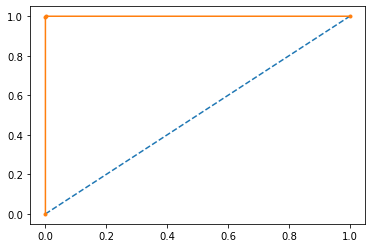

In [15]:
# AUC and ROC for the training data

# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.931


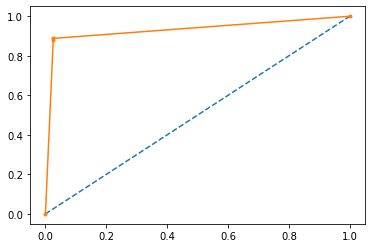

In [16]:
# AUC and ROC for the test data


# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_train, ytrain_predict))
print(confusion_matrix(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5554
           1       1.00      1.00      1.00       988

    accuracy                           1.00      6542
   macro avg       1.00      1.00      1.00      6542
weighted avg       1.00      1.00      1.00      6542

[[5554    0]
 [   4  984]]


In [19]:
print(classification_report(y_test, ytest_predict))
print(confusion_matrix(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2376
           1       0.86      0.88      0.87       429

    accuracy                           0.96      2805
   macro avg       0.92      0.93      0.92      2805
weighted avg       0.96      0.96      0.96      2805

[[2315   61]
 [  52  377]]


In [20]:
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

0.9993885661877102
0.9597147950089127


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfcl = RandomForestClassifier()
rfcl = rfcl.fit(X_train, y_train)

In [23]:
ytrain_predict_rf = rfcl.predict(X_train)
ytest_predict_rf = rfcl.predict(X_test)

In [24]:
rfcl.score(X_train,y_train)

0.9993885661877102

AUC: 1.000


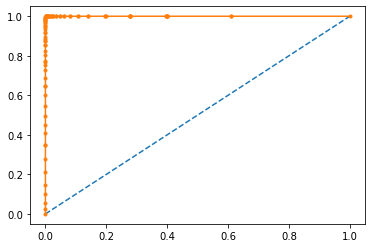

In [25]:
# AUC and ROC for the training data

# predict probabilities
probs = rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.992


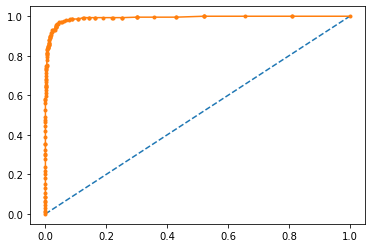

In [26]:
# AUC and ROC for the test data


# predict probabilities
probs = rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [27]:
print(classification_report(y_train, ytrain_predict_rf))
print(confusion_matrix(y_train, ytrain_predict_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5554
           1       1.00      1.00      1.00       988

    accuracy                           1.00      6542
   macro avg       1.00      1.00      1.00      6542
weighted avg       1.00      1.00      1.00      6542

[[5554    0]
 [   4  984]]


In [28]:
print(classification_report(y_test, ytest_predict_rf))
print(confusion_matrix(y_test, ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2376
           1       0.97      0.79      0.87       429

    accuracy                           0.96      2805
   macro avg       0.96      0.89      0.92      2805
weighted avg       0.96      0.96      0.96      2805

[[2364   12]
 [  89  340]]


In [29]:
print(rfcl.score(X_train,y_train))
print(rfcl.score(X_test,y_test))

0.9993885661877102
0.9639928698752228


In [30]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                                        Imp
Yearly_avg_view_on_travel_page_code                0.025728
Daily_Avg_mins_spend_on_traveling_page_code        0.040072
montly_avg_comment_on_company_page_code            0.033814
total_likes_on_outofstation_checkin_received_code  0.108949
Yearly_avg_comment_on_travel_page_code             0.022634
total_likes_on_outstation_checkin_given_code       0.024247
preferred_device                                   0.053427
yearly_avg_Outstation_checkins                     0.143949
member_in_family                                   0.088011
preferred_location_type                            0.101720
week_since_last_outstation_checkin                 0.122860
following_company_page                             0.074642
working_flag                                       0.023189
travelling_network_rating                          0.089311
Adult_flag                                         0.047447


# ANN

In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
clf = MLPClassifier()
clf = clf.fit(X_train, y_train)

C:\Users\siddd\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
ytrain_predict_ann = clf.predict(X_train)
ytest_predict_ann = clf.predict(X_test)

In [34]:
clf.score(X_train,y_train)

0.9105778049526139

AUC: 0.931


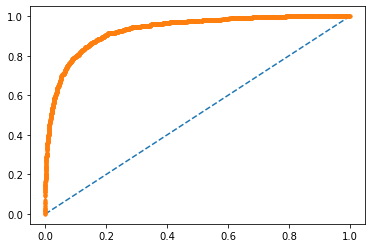

In [35]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.886


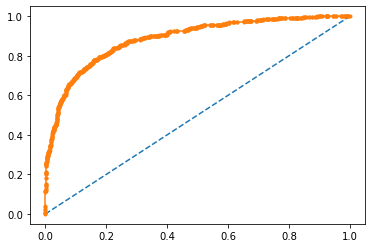

In [36]:
# AUC and ROC for the test data


# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [37]:
print(classification_report(y_train, ytrain_predict_ann))
print(confusion_matrix(y_train, ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5554
           1       0.79      0.56      0.65       988

    accuracy                           0.91      6542
   macro avg       0.86      0.77      0.80      6542
weighted avg       0.90      0.91      0.90      6542

[[5403  151]
 [ 434  554]]


In [38]:
print(classification_report(y_test, ytest_predict_ann))
print(confusion_matrix(y_test, ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2376
           1       0.70      0.52      0.60       429

    accuracy                           0.89      2805
   macro avg       0.81      0.74      0.77      2805
weighted avg       0.88      0.89      0.89      2805

[[2280   96]
 [ 205  224]]


In [39]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9105778049526139
0.8926916221033868


# Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression()
model_lr = lr.fit(X_train, y_train)

In [42]:
ytrain_predict_lr = lr.predict(X_train)
ytest_predict_lr = lr.predict(X_test)

In [43]:
lr.score(X_train,y_train)

0.8612045246102109

AUC: 0.781


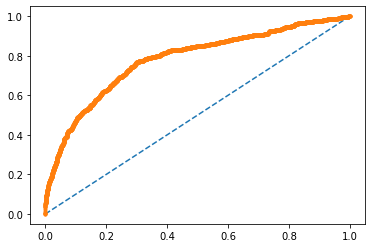

In [44]:
# AUC and ROC for the training data

# predict probabilities
probs = model_lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.788


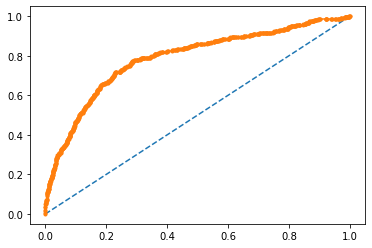

In [45]:
# AUC and ROC for the test data


# predict probabilities
probs = model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [46]:
print(classification_report(y_train, ytrain_predict_lr))
print(confusion_matrix(y_train, ytrain_predict_lr))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      5554
           1       0.64      0.18      0.28       988

    accuracy                           0.86      6542
   macro avg       0.76      0.58      0.60      6542
weighted avg       0.84      0.86      0.83      6542

[[5454  100]
 [ 808  180]]


In [47]:
print(classification_report(y_test, ytest_predict_lr))
print(confusion_matrix(y_test, ytest_predict_lr))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2376
           1       0.64      0.17      0.27       429

    accuracy                           0.86      2805
   macro avg       0.75      0.58      0.60      2805
weighted avg       0.83      0.86      0.82      2805

[[2334   42]
 [ 355   74]]


In [48]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.8612045246102109
0.8584670231729056


 # Linear Discriminant Analysis

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [50]:
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(X_train, y_train)

In [51]:
print(model_lda.coef_, model_lda.intercept_)

[[-0.14176826  0.00993103 -0.32009741 -0.20944227 -0.14176826 -0.14176826
  -0.05125646  0.0228147  -0.02017287  0.02927473  0.15636429  1.79607794
   0.19170755 -0.15758161 -1.19167524]] [-0.33001588]


In [52]:
ytrain_predict_lda = lda.predict(X_train)
ytest_predict_lda = lda.predict(X_test)

In [53]:
lda.score(X_train,y_train)

0.8624273922347906

AUC: 0.778


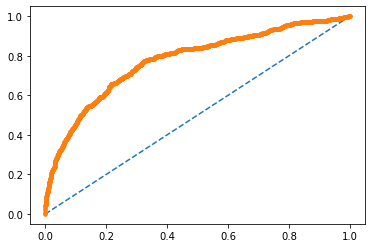

In [54]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.782


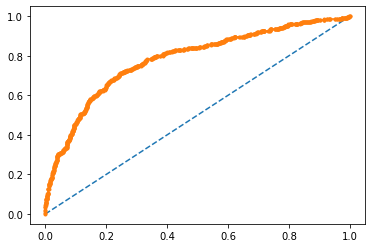

In [55]:
# AUC and ROC for the test data


# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [56]:
print(classification_report(y_train, ytrain_predict_lda))
print(confusion_matrix(y_train, ytrain_predict_lda))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      5554
           1       0.63      0.22      0.33       988

    accuracy                           0.86      6542
   macro avg       0.75      0.60      0.62      6542
weighted avg       0.84      0.86      0.83      6542

[[5424  130]
 [ 770  218]]


In [57]:
print(classification_report(y_test, ytest_predict_lda))
print(confusion_matrix(y_test, ytest_predict_lda))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2376
           1       0.60      0.21      0.31       429

    accuracy                           0.86      2805
   macro avg       0.74      0.59      0.62      2805
weighted avg       0.83      0.86      0.83      2805

[[2316   60]
 [ 338   91]]


In [58]:
print(model_lda.score(X_train,y_train))
print(model_lda.score(X_test,y_test))

0.8624273922347906
0.8581105169340464


# ensambling

In [59]:
from sklearn import metrics

In [60]:
from sklearn.ensemble import BaggingClassifier

#bgcl = BaggingClassifier(base_estimator=rfcl, n_estimators=50,random_state=1)
bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.9718360071301247


<AxesSubplot:>

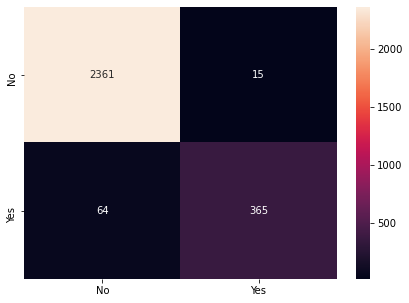

In [62]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [65]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()